<a href="https://colab.research.google.com/github/advaymehta009/bike_sharing_assign/blob/main/Bike_Sharing_Assignment_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
%matplotlib inline
sns.set_style("whitegrid")

# Bike Share Dataset

In [3]:
df = pd.read_csv('day.csv')
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


#### Summarising data

In [4]:
df.columns, df.shape

(Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
        'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
        'casual', 'registered', 'cnt'],
       dtype='object'),
 (730, 16))

In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
df.dropna()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [8]:
# Summing to find if there is any relation among year, month, season, weekday and days with count of the users
df2 = df.groupby(['yr','mnth','season','weekday']).cnt.sum().reset_index()

In [9]:
df2

,yr,mnth,season,weekday,cnt
0,0,1,1,0,4909
1,0,1,1,1,6587
2,0,1,1,2,5493
3,0,1,1,3,4918
4,0,1,1,4,5370
...,...,...,...,...,...
219,1,12,4,2,17664
220,1,12,4,3,16315
221,1,12,4,4,15035
222,1,12,4,5,10619


### Visualization - EDA
* To find the relationship between different columns

<ipython-input-10-d5ac74594725>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(['2018','2019'])
<ipython-input-10-d5ac74594725>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2].set_xticklabels(['S','M','T','W','Th','F','S'])


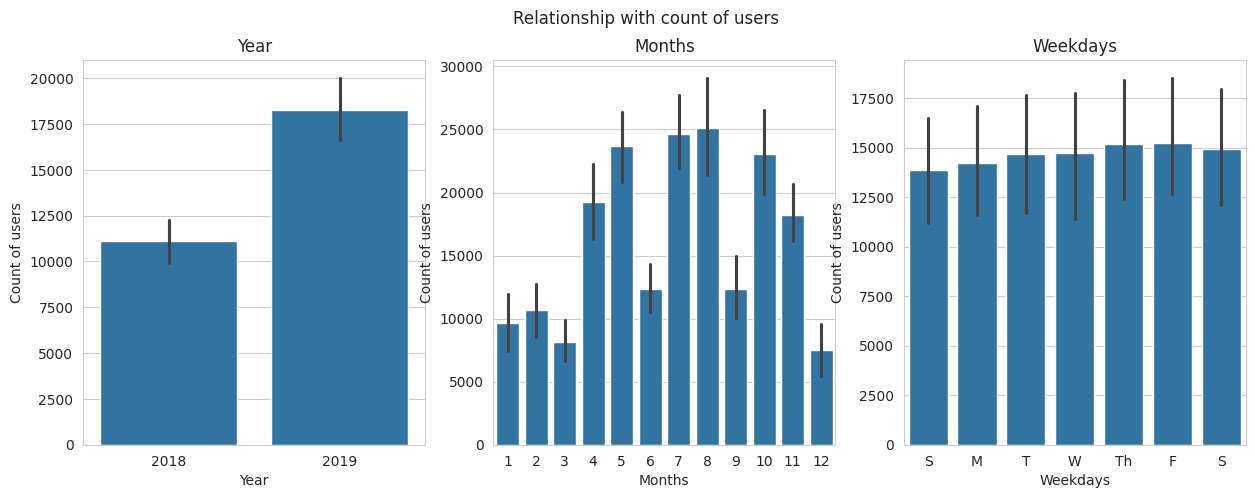

In [10]:
# sub-plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Relationship with count of users')

# Yearwise
sns.barplot(ax=axes[0], x=df2.yr, y=df2.cnt, data=df2)
axes[0].set_title('Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Count of users')
axes[0].set_xticklabels(['2018','2019'])

# Monthwise
sns.barplot(ax=axes[1], x=df2.mnth, y=df2.cnt, data=df2)
axes[1].set_title('Months')
axes[1].set_xlabel('Months')
axes[1].set_ylabel('Count of users')

# Weekdays
sns.barplot(ax=axes[2], x=df2.weekday, y=df2.cnt, data=df2)
axes[2].set_title('Weekdays')
axes[2].set_xlabel('Weekdays')
axes[2].set_ylabel('Count of users')
axes[2].set_xticklabels(['S','M','T','W','Th','F','S'])

plt.show()

<Axes: xlabel='season', ylabel='cnt'>

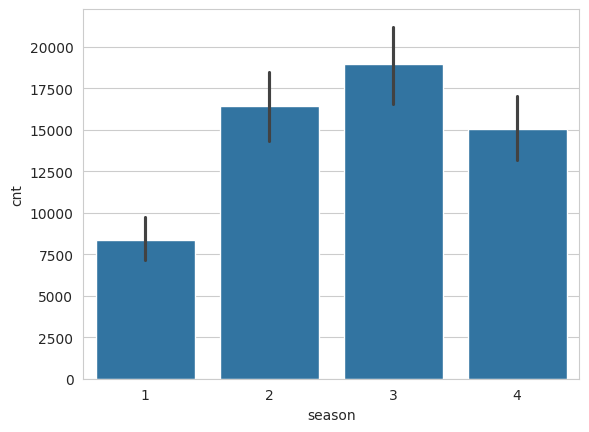

In [11]:
sns.barplot(x=df2.season, y=df2.cnt, data=df2)

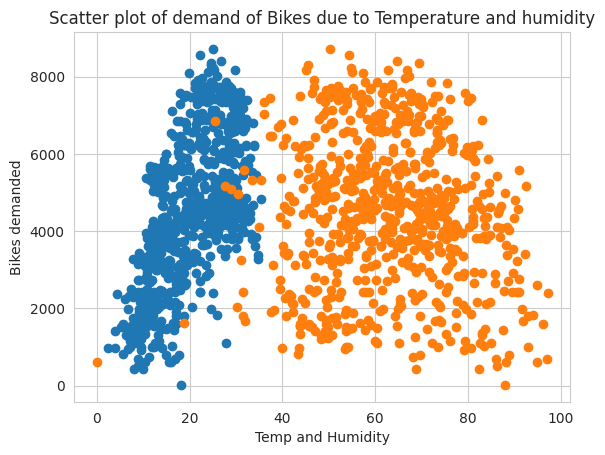

In [12]:
# Scatter plot to know if there is any effect of temperature and humidity on to the demand of Bikes
fig1 = plt.scatter(x='temp',y='cnt', data=df)
plt.scatter(x='hum',y='cnt', data=df)


plt.title('Scatter plot of demand of Bikes due to Temperature and humidity')
plt.xlabel('Temp and Humidity')
plt.ylabel('Bikes demanded')

plt.show()
# inference --- temperature is low and humidity is relationally high that cause the demand to rise

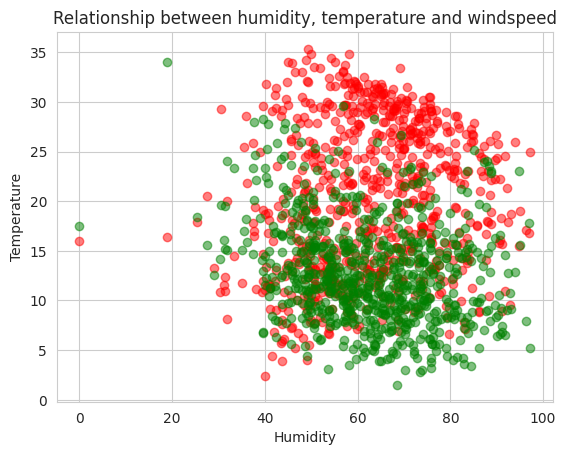

In [13]:
plt.scatter(x='hum',y='temp', data=df, c='r',alpha=0.5)
plt.scatter(x='hum',y='windspeed', data=df, c='g',alpha=0.5)

plt.title('Relationship between humidity, temperature and windspeed')
plt.xlabel('Humidity')
plt.ylabel('Temperature')


plt.show()
# Inferences -- windspeed and temp has relation

<Axes: xlabel='yr', ylabel='count'>

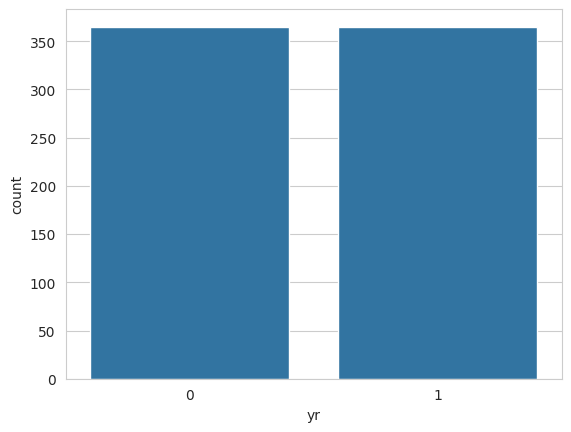

In [14]:
# Countplot for the demand in 2 years 2018(denoted by 0) and 2019(denoted by 1)
sns.countplot(x='yr', data=df)

<Axes: xlabel='season', ylabel='count'>

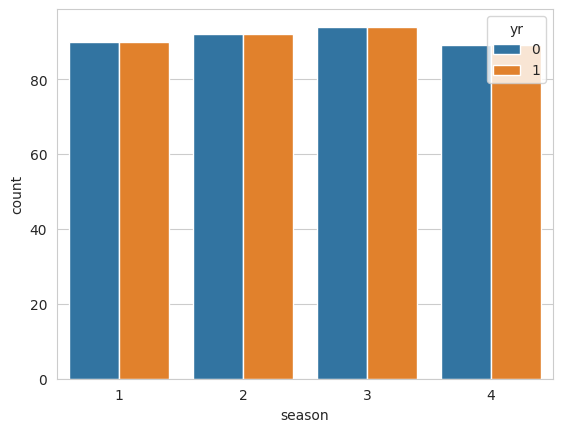

In [16]:
sns.countplot(x='season',hue='yr', data=df)

<Figure size 200x200 with 0 Axes>

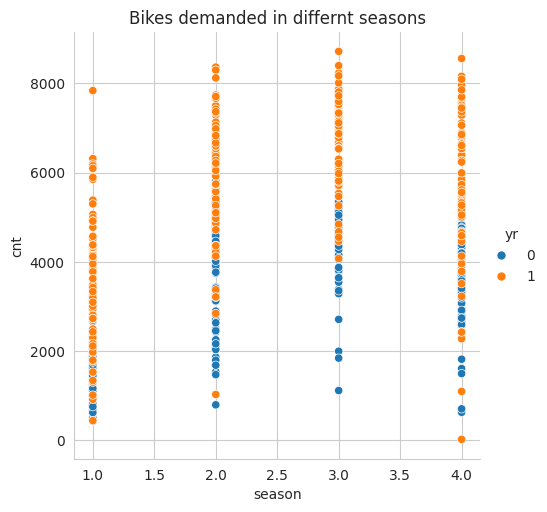

In [19]:
plt.figure(figsize=(2,2))
sns.relplot(x='season',y='cnt',hue='yr', data=df)
plt.title('Bikes demanded in differnt seasons')
plt.show()

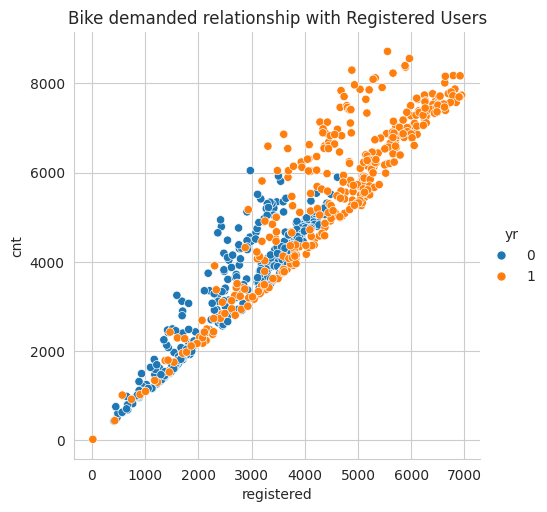

In [21]:
sns.relplot(x='registered',y='cnt',hue='yr', data=df)
plt.title('Bike demanded relationship with Registered Users')
plt.show()

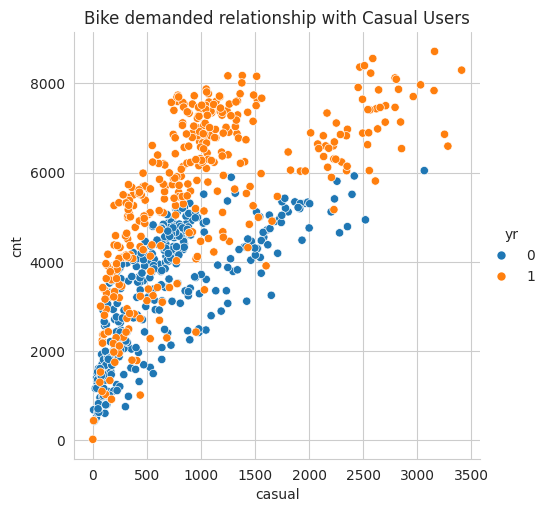

In [23]:
sns.relplot(x='casual',y='cnt',hue='yr', data=df)

plt.title('Bike demanded relationship with Casual Users')
plt.show()

Text(0.5, 1.0, 'Bikes demanded in different weather scenarios')

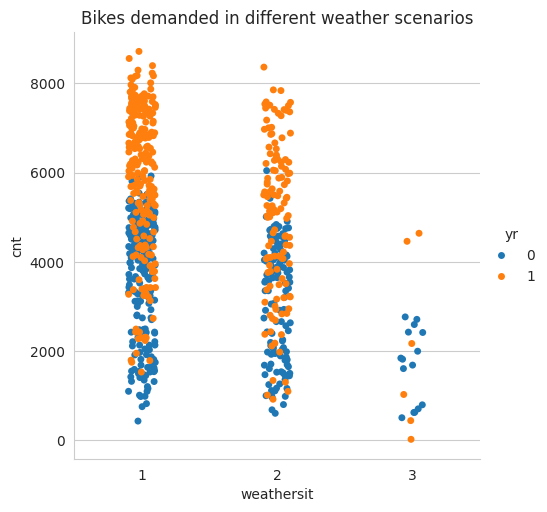

In [24]:
sns.catplot(x='weathersit',y='cnt',hue='yr', data=df)

plt.title('Bikes demanded in different weather scenarios')

##### Outlier Detection

<Axes: xlabel='yr', ylabel='cnt'>

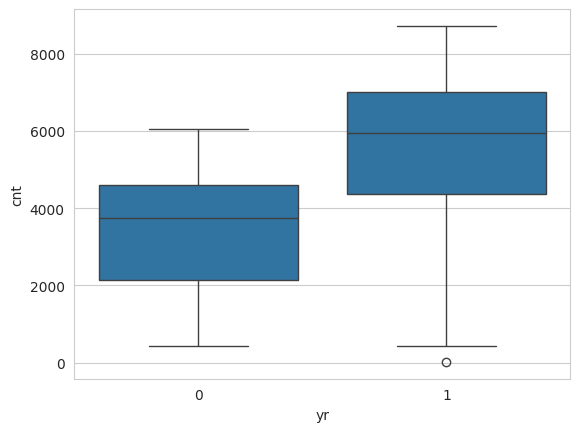

In [25]:
sns.boxplot(x='yr',y='cnt', data=df)

#### Cleaning the data

* Finding the outliers

In [38]:
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3-Q1
print(IQR)

instant        364.500000
season           1.000000
yr               1.000000
mnth             6.000000
holiday          0.000000
weekday          4.000000
workingday       1.000000
weathersit       1.000000
temp            13.068729
atemp           13.556062
hum             20.989575
windspeed        6.583939
casual         780.250000
registered    2281.000000
cnt           2796.250000
dtype: float64


In [49]:
# replace the values of outliers
print(df['cnt'].quantile(0.25))

3169.75


In [50]:
df['cnt'] = np.where(df['cnt']<500, 500, df['cnt'])

In [51]:
df['cnt']

0       985
1       801
2      1349
3      1562
4      1600
       ... 
725    2114
726    3095
727    1341
728    1796
729    2729
Name: cnt, Length: 730, dtype: int64

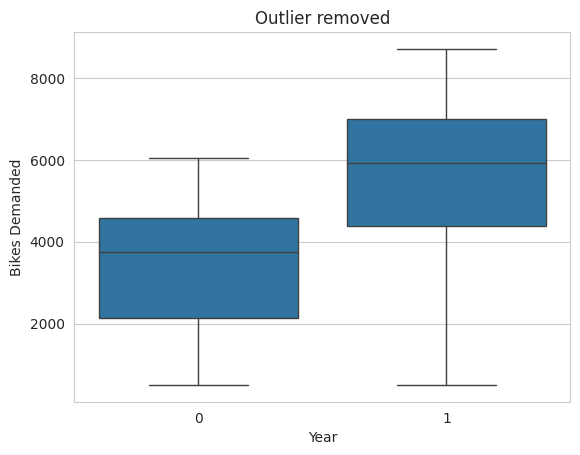

In [53]:
# Removed the outliers and can see the clear picture
sns.boxplot(x='yr',y='cnt', data=df)

plt.title('Outlier removed')
plt.ylabel('Bikes Demanded')
plt.xlabel('Year')
plt.show()

In [54]:
df['cnt'].describe()

count     730.000000
mean     4508.836986
std      1934.205823
min       500.000000
25%      3169.750000
50%      4548.500000
75%      5966.000000
max      8714.000000
Name: cnt, dtype: float64

In [55]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [56]:
df.loc[(df.holiday + df.workingday) < 1, 'days'] = 0
df.loc[(df.holiday + df.workingday) > 0, 'days'] = 1

In [57]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0.0
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,0.0
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1.0
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1.0
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114,1.0
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095,1.0
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341,0.0
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796,0.0


In [58]:
# now as we have new column company for sibsp and parch, we can drop sibsp and parch
# data = data.drop(columns='sibsp')
data = df.drop(columns=['instant','dteday','atemp','windspeed','holiday','workingday'])

In [59]:
data

,season,yr,mnth,weekday,weathersit,temp,hum,casual,registered,cnt,days
0,1,0,1,6,2,14.110847,80.5833,331,654,985,0.0
1,1,0,1,0,2,14.902598,69.6087,131,670,801,0.0
2,1,0,1,1,1,8.050924,43.7273,120,1229,1349,1.0
3,1,0,1,2,1,8.200000,59.0435,108,1454,1562,1.0
4,1,0,1,3,1,9.305237,43.6957,82,1518,1600,1.0
...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,4,2,10.420847,65.2917,247,1867,2114,1.0
726,1,1,12,5,2,10.386653,59.0000,644,2451,3095,1.0
727,1,1,12,6,2,10.386653,75.2917,159,1182,1341,0.0
728,1,1,12,0,1,10.489153,48.3333,364,1432,1796,0.0


In [60]:
data.describe()

,season,yr,mnth,weekday,weathersit,temp,hum,casual,registered,cnt,days
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,2.997260,1.394521,20.319259,62.765175,849.249315,3658.757534,4508.836986,0.712329
std,1.110184,0.500343,3.450215,2.006161,0.544807,7.506729,14.237589,686.479875,1559.758728,1934.205823,0.452987
min,1.000000,0.000000,1.000000,0.000000,1.000000,2.424346,0.000000,2.000000,20.000000,500.000000,0.000000
25%,2.000000,0.000000,4.000000,1.000000,1.000000,13.811885,52.000000,316.250000,2502.250000,3169.750000,0.000000
50%,3.000000,0.500000,7.000000,3.000000,1.000000,20.465826,62.625000,717.000000,3664.500000,4548.500000,1.000000
75%,3.000000,1.000000,10.000000,5.000000,2.000000,26.880615,72.989575,1096.500000,4783.250000,5966.000000,1.000000
max,4.000000,1.000000,12.000000,6.000000,3.000000,35.328347,97.250000,3410.000000,6946.000000,8714.000000,1.000000


#### Data Modelling
* Fitting and Training the model

In [61]:
data = data.reset_index()
data

,index,season,yr,mnth,weekday,weathersit,temp,hum,casual,registered,cnt,days
0,0,1,0,1,6,2,14.110847,80.5833,331,654,985,0.0
1,1,1,0,1,0,2,14.902598,69.6087,131,670,801,0.0
2,2,1,0,1,1,1,8.050924,43.7273,120,1229,1349,1.0
3,3,1,0,1,2,1,8.200000,59.0435,108,1454,1562,1.0
4,4,1,0,1,3,1,9.305237,43.6957,82,1518,1600,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
725,725,1,1,12,4,2,10.420847,65.2917,247,1867,2114,1.0
726,726,1,1,12,5,2,10.386653,59.0000,644,2451,3095,1.0
727,727,1,1,12,6,2,10.386653,75.2917,159,1182,1341,0.0
728,728,1,1,12,0,1,10.489153,48.3333,364,1432,1796,0.0


In [62]:
data.dropna(inplace=True)
data.isnull().sum()

index         0
season        0
yr            0
mnth          0
weekday       0
weathersit    0
temp          0
hum           0
casual        0
registered    0
cnt           0
days          0
dtype: int64

In [63]:
# x is the variable of columns or data that we need the result from
x = data.drop(columns=['index','cnt','weathersit','temp','hum'], axis=1)

In [64]:
# y is the variable of column or data that we need the result for
# like we need age data that what was the age of persons in the ship who survived here the condition is survived
y = data['cnt']

In [67]:
# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [68]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(584, 7)
(584,)
(146, 7)
(146,)


In [73]:
# fitting multiple linear regression to training set

regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [74]:
x_train.head()

,season,yr,mnth,weekday,casual,registered,days
239,3,0,8,0,1415,2919,0.0
97,2,0,4,5,172,1299,1.0
503,2,1,5,6,3410,4884,0.0
642,4,1,10,5,1516,6640,1.0
498,2,1,5,1,342,2501,1.0


In [75]:
y_test.head(20)

196    5923
187    4592
14     1248
31     1360
390    4075
319    1817
299    2659
702    6606
462    5169
27     1167
40     1538
360    1162
55     1461
157    4833
193    4342
170    4010
618    7767
679    6852
382    3376
79     2077
Name: cnt, dtype: int64

In [76]:
# Compute model slope and intercept
a = regressor.coef_
b = regressor.intercept_
print("Estimated model slope, a:" , a)
print("Estimated model intercept, b:" , b)

Estimated model slope, a: [ 3.99247988 11.98022408 -0.14752003 -0.15671362  1.00378743  0.99360568
  9.930861  ]
Estimated model intercept, b: -0.4851592909290048


### Predict and Test

In [77]:
# Predicting the test set results
y_pred = regressor.predict(x_test)

In [78]:
# Testing the result with actual values

regressor.predict([[2,0,6,6,1869,3473,0.0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5332.54564967])

In [79]:
y_pred[:10]

array([5919.26529147, 4590.07798602, 1244.69976065, 1364.61198688,
       4076.07154051, 1830.18064156, 2667.75470005, 6604.68147016,
       5177.54302306, 1172.43183329])

### Model Evaluation

In [84]:
# error in prediction
import math
rmse = math.sqrt(mean_squared_error(y_test,y_pred))
rmse

4.954021789094921

In [86]:
# measure the performance by r2 seems it is a good score
R2=r2_score(y_test,y_pred)
R2

0.9999944565373046

Plot the Results

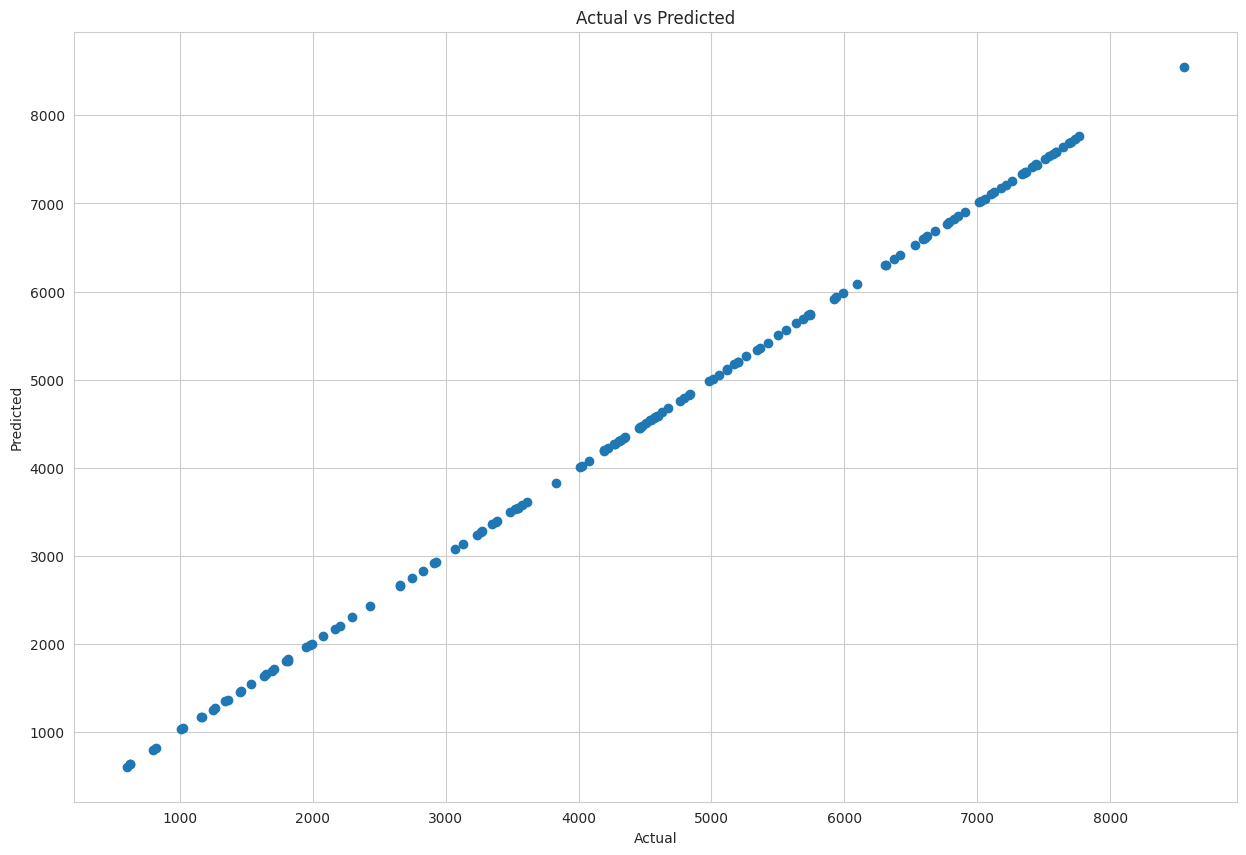

In [87]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

##### Predicted Values

In [89]:
y_pred_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred, 'Difference': y_test-y_pred})
y_pred_df.head(20)

,Actual Value,Predicted Value,Difference
196,5923,5919.265291,3.734709
187,4592,4590.077986,1.922014
14,1248,1244.699761,3.300239
31,1360,1364.611987,-4.611987
390,4075,4076.071541,-1.071541
319,1817,1830.180642,-13.180642
299,2659,2667.754700,-8.754700
702,6606,6604.681470,1.318530
462,5169,5177.543023,-8.543023
27,1167,1172.431833,-5.431833


Residual Analysis :

In [92]:
from sklearn.metrics import r2_score

y_train_pred = regressor.predict(x_train)

r2_test = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, y_train_pred)

print('Test data r^2 :',round((r2_test*100),2))
print('Train data r^2 :',round((r2_train*100),2))

Test data r^2 : 100.0
Train data r^2 : 99.99


In [93]:
r2_test

0.9999944565373046